# TPP10 P2

Pragmatic 3

First import participant 2 file.

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from pandas.api.types import CategoricalDtype
import seaborn as sns

# import csv with pandas
dataset_path = Path('../../../datasets')
raw_data_p2 = pd.read_csv(dataset_path / 'Participant-02-detail.csv')
p2 = raw_data_p2.copy()
p2

,Source,Date,Hour,Count
0,P2 Phone,2022-01-01,5,31
1,P2’s Apple Watch,2021-12-31,21,20
2,P2’s Apple Watch,2021-12-31,21,16
3,P2’s Apple Watch,2022-01-01,5,29
4,P2’s Apple Watch,2022-01-01,5,13
...,...,...,...,...
31633,P2 Phone,2022-09-01,19,498
31634,P2 Phone,2022-09-01,19,26
31635,P2’s Apple Watch,2022-09-01,19,110
31636,P2 Phone,2022-09-01,20,21


In [2]:
dataset_path = Path('../../../datasets/additional')
raw_data = pd.read_csv(dataset_path / 'rainfall_syd.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sydrain = raw_data.copy()
sydrain

,Date,Product code,Bureau of Meteorology station number,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,2022-01-01,IDCJAC0009,66214,0.0,1.0,N
1,2022-01-02,IDCJAC0009,66214,0.0,1.0,N
2,2022-01-03,IDCJAC0009,66214,0.0,1.0,N
3,2022-01-04,IDCJAC0009,66214,0.0,1.0,N
4,2022-01-05,IDCJAC0009,66214,3.8,1.0,N
...,...,...,...,...,...,...
281,2022-10-09,IDCJAC0009,66214,50.2,1.0,N
282,2022-10-10,IDCJAC0009,66214,2.2,1.0,N
283,2022-10-11,IDCJAC0009,66214,0.0,1.0,N
284,2022-10-12,IDCJAC0009,66214,0.2,1.0,N


In [3]:
dataset_path = Path('../../../datasets/additional')
raw_data2 = pd.read_csv(dataset_path / 'solar_cent_park.csv',parse_dates= {"Date" : ["Year","Month","Day"]})
sun = raw_data2.copy()
sun

,Date,Product code,Bureau of Meteorology station number,Daily global solar exposure (MJ/m*m)
0,2022-01-01,IDCJAC0016,66160,27.6
1,2022-01-02,IDCJAC0016,66160,31.9
2,2022-01-03,IDCJAC0016,66160,31.6
3,2022-01-04,IDCJAC0016,66160,28.6
4,2022-01-05,IDCJAC0016,66160,16.8
...,...,...,...,...
280,2022-10-08,IDCJAC0016,66160,11.6
281,2022-10-09,IDCJAC0016,66160,18.3
282,2022-10-10,IDCJAC0016,66160,15.1
283,2022-10-11,IDCJAC0016,66160,15.7


Cleaning the data

In [4]:
# date column is converted to datetime format and weekday name and month is extracted from date
p2['Date'] = pd.to_datetime(p2['Date'])
p2['Week Day'] = p2['Date'].dt.day_name()
p2['Month'] = p2['Date'].dt.month_name()

sydrain['Month'] = sydrain['Date'].dt.month_name()
sydrain['Week Day'] = sydrain['Date'].dt.day_name()
sun['Month'] = sun['Date'].dt.month_name()
sun['Week Day'] = sun['Date'].dt.day_name()
# column count is renamed to show what it counts
p2 = p2.rename(columns={'Count': 'Steps (count)'})


In [5]:
# week days are ordered so that it's matches the order that day of the week are.
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
p2['Week Day'] = p2['Week Day'].astype(cat_type)
sydrain['Week Day'] = sydrain['Week Day'].astype(cat_type)
sun['Week Day'] = sun['Week Day'].astype(cat_type)

In [6]:
#Using drop() to delete rows based on column value 
# I want to drop the months of december and september as they have less than 1 week of recorded data therefore is not required
p2.drop(p2[p2['Month'] == 'December'].index, inplace = True)
p2.drop(p2[p2['Month'] == 'September'].index, inplace = True)

## Exploration

### For Participant 2

In [7]:
# first group the data by date
day = p2.groupby(['Date'], as_index=False).agg({'Steps (count)': 'sum','Week Day': 'first','Month': 'first'})
day

,Date,Steps (count),Week Day,Month
0,2021-10-08,41,Friday,October
1,2022-01-01,22332,Saturday,January
2,2022-01-02,23324,Sunday,January
3,2022-01-03,8887,Monday,January
4,2022-01-04,22684,Tuesday,January
...,...,...,...,...
239,2022-08-27,23460,Saturday,August
240,2022-08-28,17600,Sunday,August
241,2022-08-29,13363,Monday,August
242,2022-08-30,17756,Tuesday,August


produce visualisation of the distribution of steps for days of the week

Text(0.5, 1.0, 'Average daily steps by weekday')

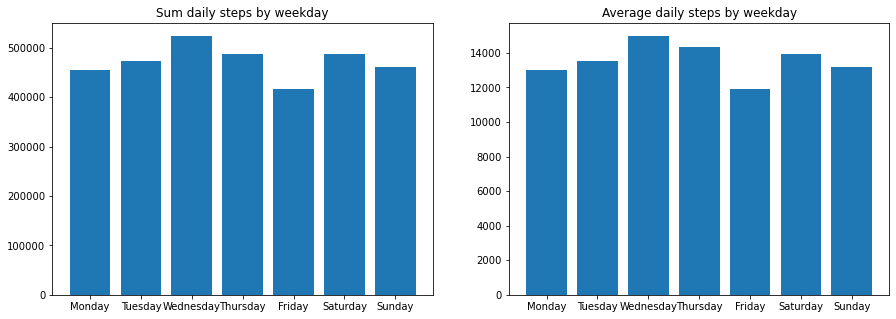

In [8]:
# first group the data by weekday, week_count variable for the total sum of steps for those week days
# week_avg variable for the average step count for those week days
week_count = day.groupby(['Week Day'])['Steps (count)'].sum()
week_avg = day.groupby(['Week Day'])['Steps (count)'].mean()
# set size of the plot
plt.rcParams["figure.figsize"] = (15,5)

# make side by side subplots
fig, axs = plt.subplots(1, 2)
# bar plot for total steps
axs[0].bar(cats, week_count)
axs[0].set_title('Sum daily steps by weekday')
# bar plot for average steps
axs[1].bar(cats, week_avg)
axs[1].set_title('Average daily steps by weekday')

From this we can see that the participant 2 is most active on Wednesday and least active on Fridays.

## Sub Question

Does the week day step patterns differ month to month?

In [9]:
# order the months by the time they were recorded
cat2 = ['December','January','February','March','April','May','June','July','August','September']
cat2_type = CategoricalDtype(categories=cat2, ordered=True)
day['Month'] = day['Month'].astype(cat2_type)
# group by month
week_month_count = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean','Date':'first'}).reset_index()
week_month_count

,Month,Week Day,Steps (count),Date
0,December,Monday,NaN,NaT
1,December,Tuesday,NaN,NaT
2,December,Wednesday,NaN,NaT
3,December,Thursday,NaN,NaT
4,December,Friday,NaN,NaT
...,...,...,...,...
65,September,Wednesday,NaN,NaT
66,September,Thursday,NaN,NaT
67,September,Friday,NaN,NaT
68,September,Saturday,NaN,NaT


## Line Graph 
Make line graph showing trends in each month

C:\Users\autum\AppData\Local\Temp/ipykernel_23756/1174116253.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


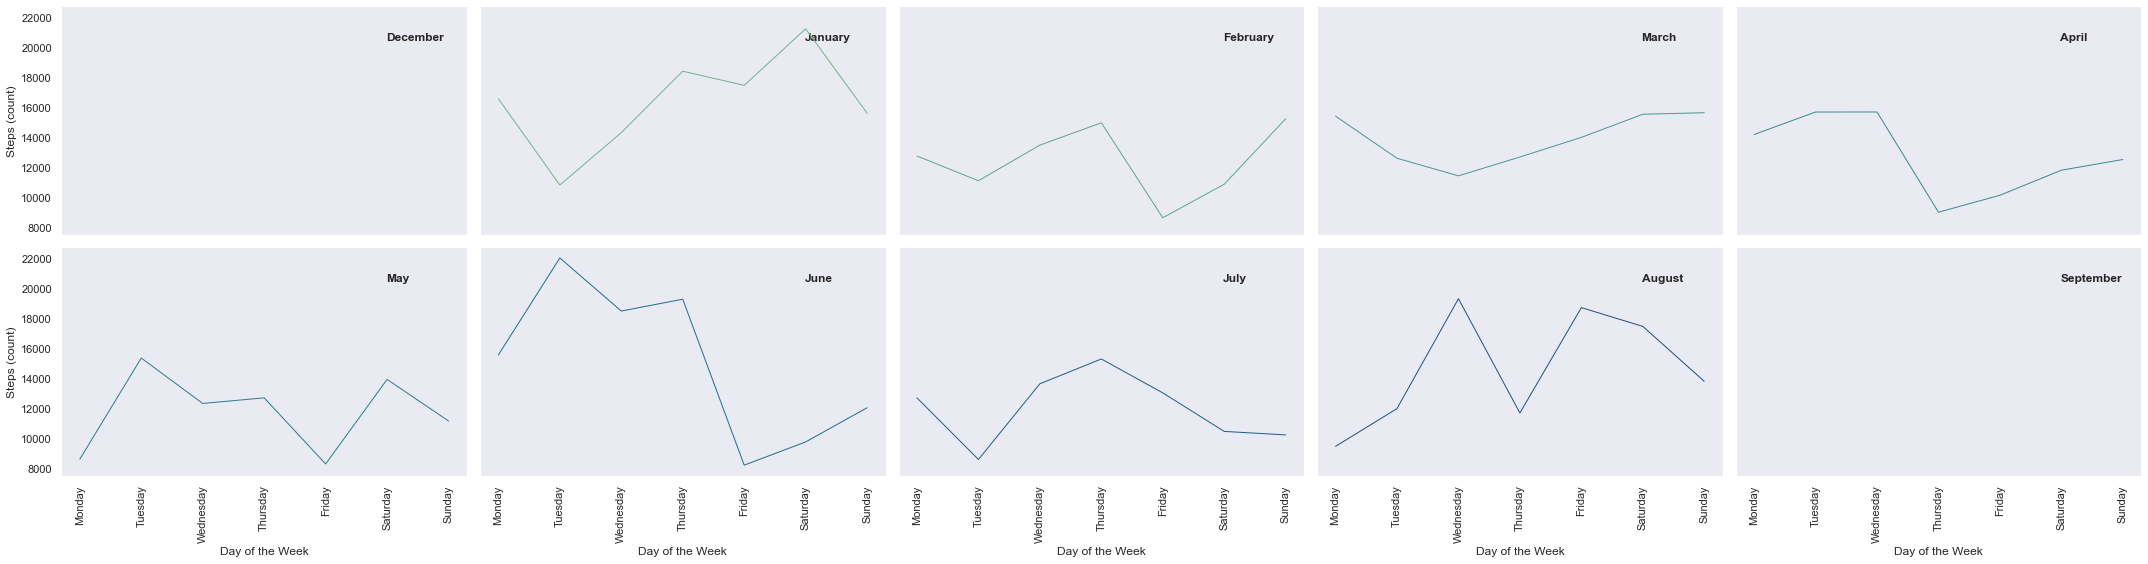

In [10]:

import seaborn as sns

sns.set_theme(style="dark")

# Plot each months's step count for day of the week.
g = sns.relplot(
    data=week_month_count,
    x="Week Day", y="Steps (count)", col="Month", hue="Month",
    kind="line", palette="crest", linewidth=1, zorder=5,
    col_wrap=5, height=4, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for Month, ax in g.axes_dict.items():
    # Rotate the xticks by 90 degrees  
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    # Add the title for the months as an annotation within the plot
    ax.text(.8, .85, Month, transform=ax.transAxes, fontweight="bold")
    

# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Day of the Week", "Steps (count)")
g.tight_layout()


From this we can that there is not really any observable monthly trends in this participant's step patterns as each months shows a different pattern.

# Heatmap plot

Text(0.5, 1.0, 'Monthly Average Step Count for Days of the Week')

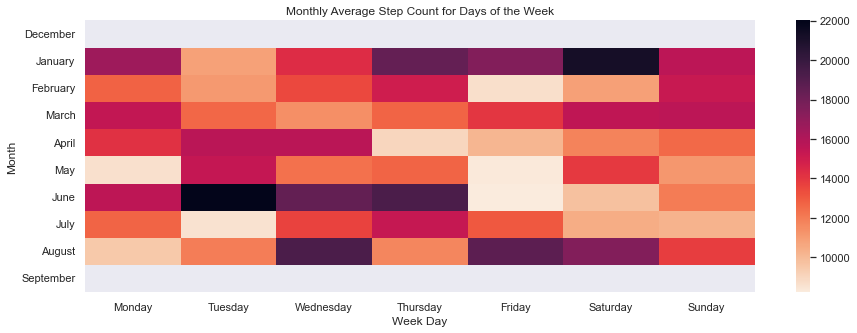

In [11]:
# first group the required data
week_month_count2 = day.groupby(['Month','Week Day']).agg({'Steps (count)': 'mean'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count2 = week_month_count2.pivot("Month", "Week Day", "Steps (count)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count2,cmap='rocket_r')
ax.set_title('Monthly Average Step Count for Days of the Week')

No monthly trend in the weekly step pattern could be observed, however friday, saturday and sunday does appear to have lower step count in comparison to the other week days.

## Sub Question 2

Does weather conditions such as rainfall and amount of sun impact the number of steps made in a week.

<BarContainer object of 7 artists>

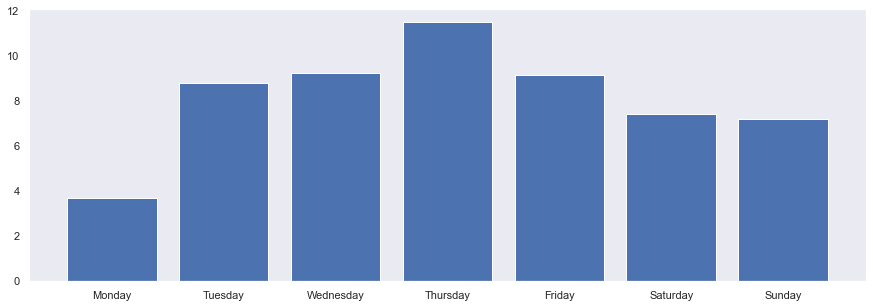

In [12]:
rain_count = sydrain.groupby(['Week Day'])['Rainfall amount (millimetres)'].mean().reset_index()
rain_count
plt.bar(rain_count['Week Day'],rain_count['Rainfall amount (millimetres)'])

Text(0.5, 1.0, 'Monthly Average Rainfall for Days of the Week')

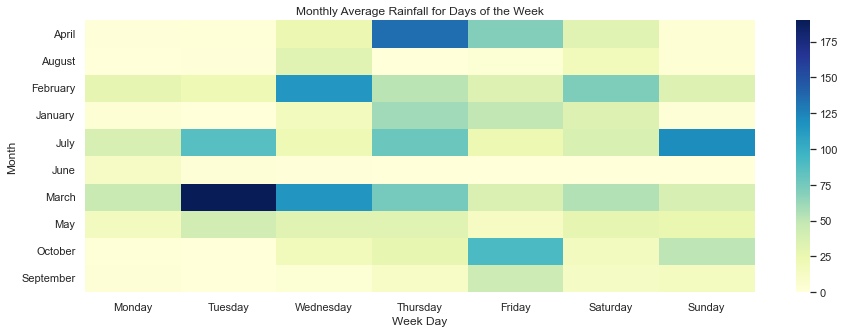

In [13]:
# first group the required data
week_month_count3 = sydrain.groupby(['Month','Week Day']).agg({'Rainfall amount (millimetres)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count3 = week_month_count3.pivot("Month", "Week Day", "Rainfall amount (millimetres)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count3,cmap='YlGnBu')
ax.set_title('Monthly Average Rainfall for Days of the Week')

In [14]:
day

,Date,Steps (count),Week Day,Month
0,2021-10-08,41,Friday,NaN
1,2022-01-01,22332,Saturday,January
2,2022-01-02,23324,Sunday,January
3,2022-01-03,8887,Monday,January
4,2022-01-04,22684,Tuesday,January
...,...,...,...,...
239,2022-08-27,23460,Saturday,August
240,2022-08-28,17600,Sunday,August
241,2022-08-29,13363,Monday,August
242,2022-08-30,17756,Tuesday,August


In [15]:
t = day.copy()

t = pd.merge(t,sydrain[['Rainfall amount (millimetres)','Date']],on='Date', how='left')
t

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres)
0,2021-10-08,41,Friday,NaN,NaN
1,2022-01-01,22332,Saturday,January,0.0
2,2022-01-02,23324,Sunday,January,0.0
3,2022-01-03,8887,Monday,January,0.0
4,2022-01-04,22684,Tuesday,January,0.0
...,...,...,...,...,...
239,2022-08-27,23460,Saturday,August,12.4
240,2022-08-28,17600,Sunday,August,3.6
241,2022-08-29,13363,Monday,August,0.0
242,2022-08-30,17756,Tuesday,August,0.4


In [16]:
t.corr()

,Steps (count),Rainfall amount (millimetres)
Steps (count),1.000000,-0.093948
Rainfall amount (millimetres),-0.093948,1.000000


<BarContainer object of 7 artists>

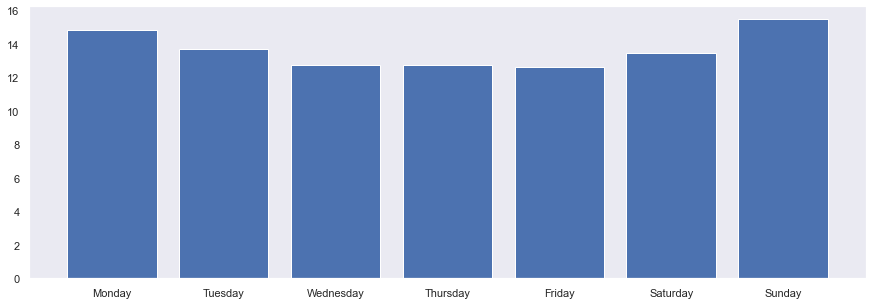

In [17]:
sun_count = sun.groupby(['Week Day'])['Daily global solar exposure (MJ/m*m)'].mean().reset_index()
# sun_count
plt.bar(sun_count['Week Day'],sun_count['Daily global solar exposure (MJ/m*m)'])

Text(0.5, 1.0, 'Monthly Average Sunlight for Days of the Week')

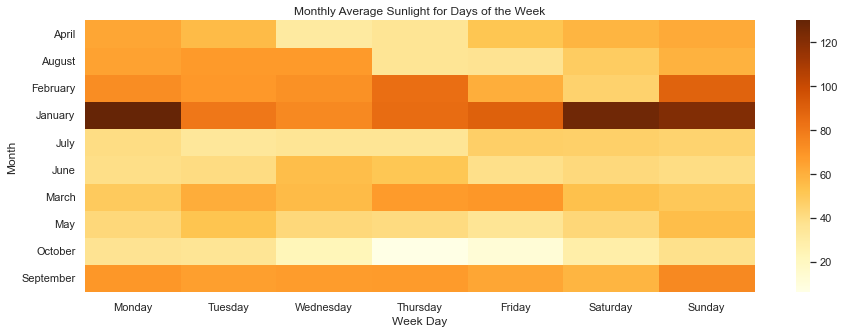

In [18]:
# first group the required data
week_month_count4 = sun.groupby(['Month','Week Day']).agg({'Daily global solar exposure (MJ/m*m)': 'sum'}).reset_index()
# create pivot table from the above dataframe, so the format matches what is required for seaborn heatmap
week_month_count4 = week_month_count4.pivot("Month", "Week Day", "Daily global solar exposure (MJ/m*m)")
# now plot the data using seaborn
ax = sns.heatmap(week_month_count4, cmap='YlOrBr')
ax.set_title('Monthly Average Sunlight for Days of the Week')

In [19]:
t2 = pd.merge(t,sun[['Daily global solar exposure (MJ/m*m)','Date']],on='Date', how='left')
t2

,Date,Steps (count),Week Day,Month,Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
0,2021-10-08,41,Friday,NaN,NaN,NaN
1,2022-01-01,22332,Saturday,January,0.0,27.6
2,2022-01-02,23324,Sunday,January,0.0,31.9
3,2022-01-03,8887,Monday,January,0.0,31.6
4,2022-01-04,22684,Tuesday,January,0.0,28.6
...,...,...,...,...,...,...
239,2022-08-27,23460,Saturday,August,12.4,10.6
240,2022-08-28,17600,Sunday,August,3.6,16.4
241,2022-08-29,13363,Monday,August,0.0,11.9
242,2022-08-30,17756,Tuesday,August,0.4,16.0


In [20]:
t2.corr()

,Steps (count),Rainfall amount (millimetres),Daily global solar exposure (MJ/m*m)
Steps (count),1.000000,-0.093948,0.288391
Rainfall amount (millimetres),-0.093948,1.000000,-0.262507
Daily global solar exposure (MJ/m*m),0.288391,-0.262507,1.000000
